In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)
pd.set_option('display.max_columns', None)

import numpy as np

from google.colab import drive
import os

import matplotlib
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve

import xgboost


In [ ]:
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Mounted at /content/drive


## Ejercicio 1

In [ ]:
orders = pd.read_csv("{}/finalOrders.txt".format(contentFolder), sep=";")

## Ejercicio 2

In [ ]:
print("Cantidad de filas: {}".format(orders.shape[0]))
print("Cantidad de columnas: {}".format(orders.shape[1]))

Cantidad de filas: 504121
Cantidad de columnas: 17


## Ejercicio *3*

In [ ]:
X = orders.drop(columns = ["orderID", "orderDate", "target"])
y = orders.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
round(len(X_train) / len(X),2)

0.8

## Ejercicio 4

In [ ]:
treeModel = tree.DecisionTreeClassifier(max_depth=5, criterion="entropy", min_samples_split = 15).fit(X_train, y_train)

In [ ]:
treeProbs = treeModel.predict_proba(X_test)[:,-1]

## Ejercicio 5

In [ ]:
#El accuracy del modelo es:
accuracy_score(y_test, treeProbs > 0.5)

0.7332804363997024

## Ejercicio 6

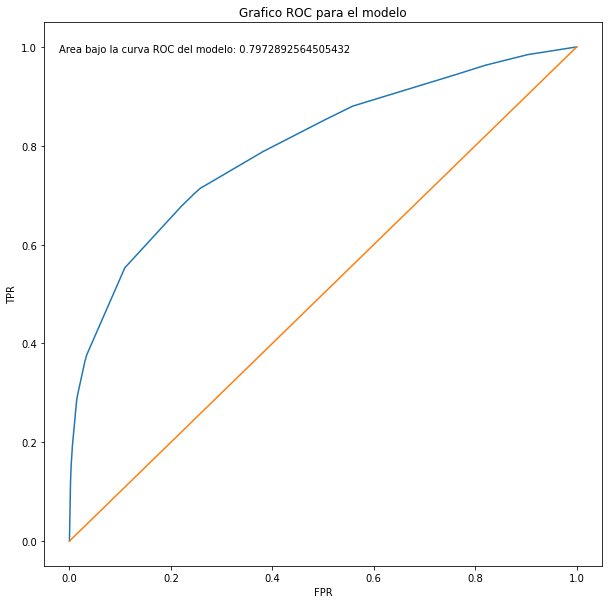

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
areaBajoCurvaRoc = roc_auc_score(y_test, treeProbs)
fpr, tpr, _ = roc_curve(y_test, treeProbs)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

## Ejercicio 7

In [ ]:
treeModel = tree.DecisionTreeClassifier(max_depth=7, criterion="entropy", min_samples_split = 15).fit(X_train, y_train)

In [ ]:
treeProbs2 = treeModel.predict_proba(X_test)[:,-1]

##Ejercicio 8

In [ ]:
areaBajoCurvaRoc = roc_auc_score(y_test, treeProbs)
areaBajoCurvaRoc2 = roc_auc_score(y_test, treeProbs2)
print ("AUC Primer Modelo: {} y AUC Segundo Modelo: {}".format(areaBajoCurvaRoc,areaBajoCurvaRoc2))

AUC Primer Modelo: 0.7972892564505432 y AUC Segundo Modelo: 0.8058096748013804


##Ejercicio 9

In [ ]:
logModel = LogisticRegression().fit(X_train, y_train)

In [ ]:
logProbs = logModel.predict_proba(X_test)[:,-1]

##Ejercicio 10

In [ ]:
orders.groupby("target").size()/orders.shape[0]

target
0   0.534681158
1   0.465318842
dtype: float64

Las bases se encuentran bastante balanceadas, por lo que la metrica de Accuracy puede ser una metrica utilizada para validar performance

## Ejercicio 11

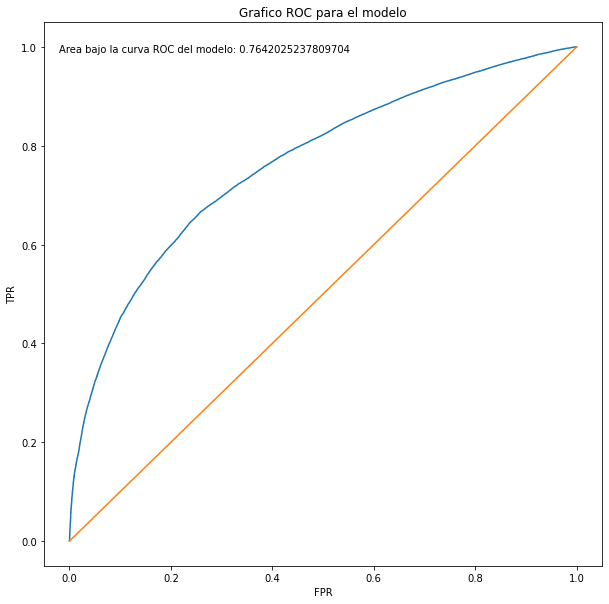

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
areaBajoCurvaRocLog = roc_auc_score(y_test, logProbs)
fpr, tpr, _ = roc_curve(y_test, logProbs)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

##Ejercicio 12

Ajustando el hiperparametro solver mejora 4 puntos la AUC

In [ ]:
logModel = LogisticRegression(solver= "newton-cg").fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

In [ ]:
logProbs = logModel.predict_proba(X_test)[:,-1]
areaBajoCurvaRocLog = roc_auc_score(y_test, logProbs)
areaBajoCurvaRocLog

0.8001273470254471

## Ejercicio 13

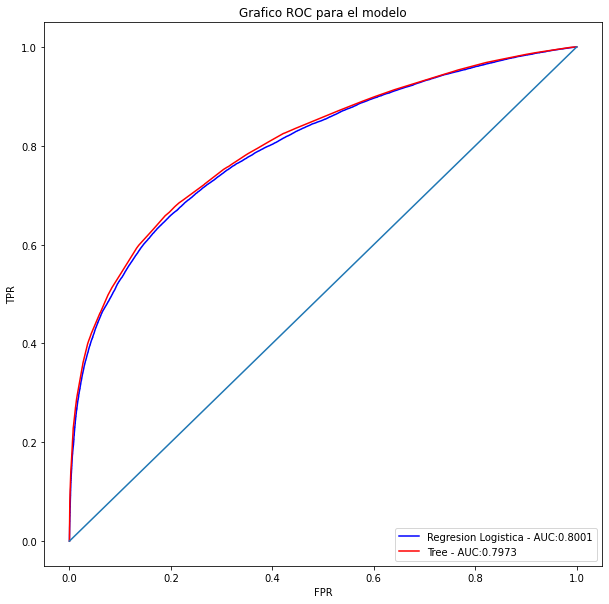

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
areaBajoCurvaRocLog = roc_auc_score(y_test, logProbs)
areaBajoCurvaRocTree = roc_auc_score(y_test, treeProbs)

fpr1, tpr1, _ = roc_curve(y_test, logProbs)
fpr2, tpr2, _ = roc_curve(y_test, treeProbs2)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr1, tpr1, "-b", label="Regresion Logistica - AUC:{}".format(round(areaBajoCurvaRocLog,4)))
plt.plot(fpr2, tpr2, "-r", label="Tree - AUC:{}".format(round(areaBajoCurvaRocTree,4)))
plt.legend(loc="lower right")
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Ejercicio 14

In [ ]:
xgbModel = xgboost.XGBClassifier().fit(X_train, y_train)

XGBClassifier()

In [ ]:
xgbProbs = xgbModel.predict_proba(X_test)[:,-1]
areaBajoCurvaRocLog = roc_auc_score(y_test, logProbs)
areaBajoCurvaRocLog

0.8001273470254471

##Ejercicio 15

([<matplotlib.axis.XTick at 0x7ff3923ea690>,
 [Text(0, 0, 'totalPrice'),
  Text(0, 0, 'flagMismoProductoDiferenteTamanio'),
  Text(0, 0, 'distinctProducts'),
  Text(0, 0, 'paymentMethod'),
  Text(0, 0, 'flagMismoProductoDiferenteColor'),
  Text(0, 0, 'flagPrecioMenorRrp'),
  Text(0, 0, 'customerID'),
  Text(0, 0, 'trimestre'),
  Text(0, 0, 'flagVoucher'),
  Text(0, 0, 'mesCompra'),
  Text(0, 0, 'deviceID'),
  Text(0, 0, 'diaCompra'),
  Text(0, 0, 'diaSemana'),
  Text(0, 0, 'totalPriceDeciles')])

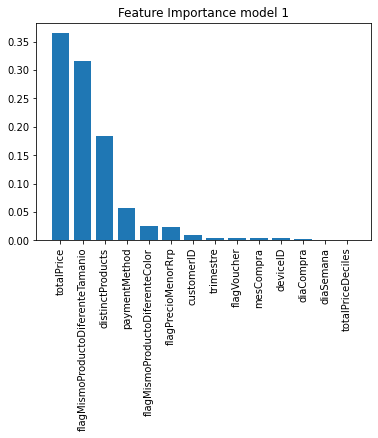

In [ ]:
#La importancia de las variables o feature importance nos permite identificar entre todos los modelos débiles que se generan las variables que más aparecen y te los pondera para 
#dar una explicación de las variables
importances = xgbModel.feature_importances_
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1][0:20]
names = [X_train.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance model 1")
plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), names, rotation=90)


##Ejercicio 16

In [ ]:
xgbModel = xgboost.XGBClassifier(n_estimators = 500).fit(X_train, y_train)
xgbProbs = xgbModel.predict_proba(X_test)[:,-1]
areaBajoCurvaRocLog = roc_auc_score(y_test, logProbs)
areaBajoCurvaRocLog

0.8001273470254471